In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [4]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [5]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

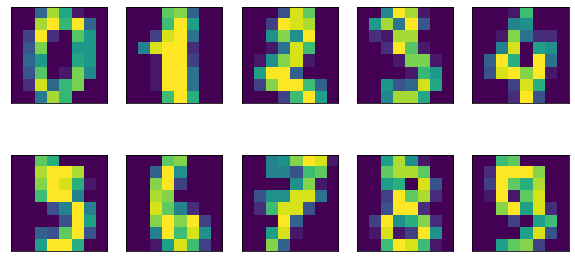

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(),'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

차원축소

In [7]:
pca = PCA(n_components=2)
digit_pca = pca.fit_transform(digits.data)

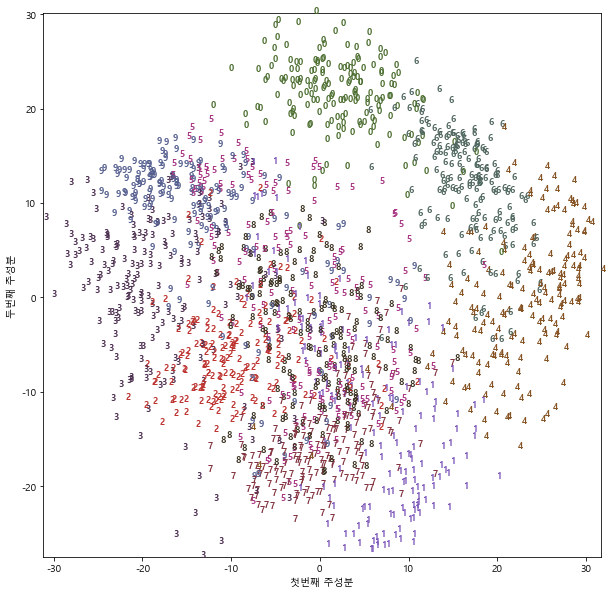

In [8]:
# pca 차원축소
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digit_pca[:,0].min(), digit_pca[:,0].max())
plt.ylim(digit_pca[:,1].min(), digit_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digit_pca[i,0], digit_pca[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight':'bold','size':9})

plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

In [9]:
tsne = TSNE(random_state=0)
digit_tsne = tsne.fit_transform(digits.data)

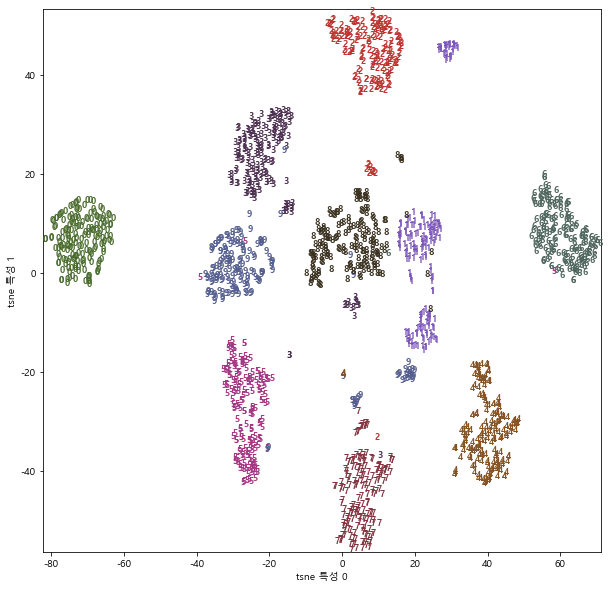

In [10]:
# tsne 차원축소 -> 시각화 좋음
plt.figure(figsize=(10,10))
plt.xlim(digit_tsne[:,0].min(),digit_tsne[:,0].max()+1)
plt.ylim(digit_tsne[:,1].min(),digit_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digit_tsne[i,0], digit_tsne[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight':'bold','size':9})

plt.xlabel('tsne 특성 0')
plt.ylabel('tsne 특성 1')
plt.show()

In [11]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
train_df = df.iloc[:,:4]
train_df.columns = [['sepal length','sepal width','petal length','petal width']]
train_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
tsne = TSNE(n_components=2)
tsne.fit_transform(train_df)
tsne_df = pd.DataFrame(tsne.fit_transform(train_df), columns=['conponent 0', 'conponent 1'])
tsne_df.head()

,conponent 0,conponent 1
0,-18.030775,14.545646
1,-17.543062,11.930000
2,-16.611017,12.487335
3,-16.698387,12.029633
4,-17.680067,14.726546


In [16]:
tsne_df['target'] = df['target']
# target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

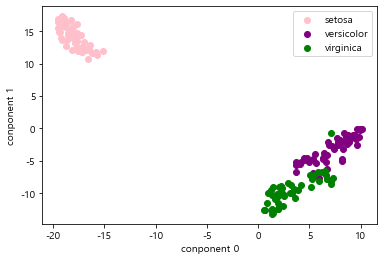

In [17]:
# target별 시각화
plt.scatter(tsne_df_0['conponent 0'], tsne_df_0['conponent 1'], c='pink', label='setosa')
plt.scatter(tsne_df_1['conponent 0'], tsne_df_1['conponent 1'], c='purple', label='versicolor')
plt.scatter(tsne_df_2['conponent 0'], tsne_df_2['conponent 1'], c='green', label='virginica')

plt.xlabel('conponent 0')
plt.ylabel('conponent 1')
plt.legend()
plt.show()

2차원 공간에 꽃종류별로 구분이 잘되어 임베딩 됨

In [18]:
tsne = TSNE(n_components=3)
tsne_df = pd.DataFrame(tsne.fit_transform(train_df), columns=['0','1','2'])
tsne_df['target'] = df['target']
tsne_df.head()

,0,1,2,target
0,-92.059189,20.426258,45.982185,0
1,-60.555565,61.834633,54.747547,0
2,-140.865112,-67.363312,10.407743,0
3,-124.748535,-113.251511,-4.652394,0
4,-91.770180,-63.245720,26.275389,0


In [20]:
from mpl_toolkits.mplot3d import Axes3D

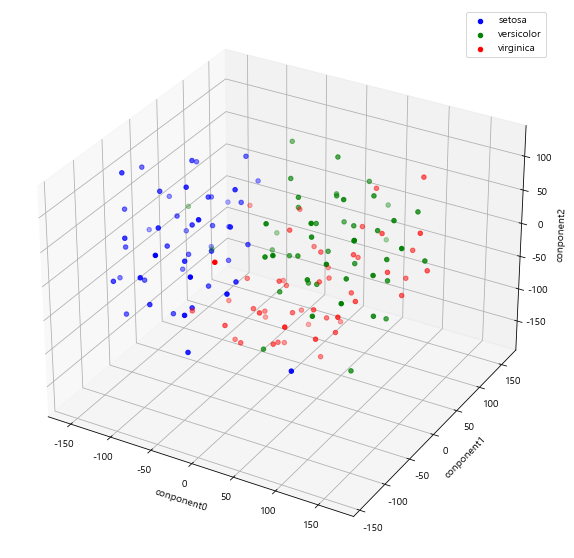

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

ax.scatter(tsne_df_0['0'],tsne_df_0['1'],tsne_df_0['2'], c='blue', label='setosa')
ax.scatter(tsne_df_1['0'],tsne_df_1['1'],tsne_df_1['2'], c='green', label='versicolor')
ax.scatter(tsne_df_2['0'],tsne_df_2['1'],tsne_df_2['2'], c='red', label='virginica')

ax.set_xlabel('conponent0')
ax.set_ylabel('conponent1')
ax.set_zlabel('conponent2')
ax.legend()
plt.show()